# Data

We have the CSV file output of a `git blame` result.

In [1]:
import pandas as pd

blame_log = pd.read_csv("../demos/dataset/linux_blame_log.csv")
blame_log.head()

,path,author,timestamp,line
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,1
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,2
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,3
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,1253753175000000000,4
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,5


In [2]:
blame_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5665947 entries, 0 to 5665946
Data columns (total 4 columns):
path         object
author       object
timestamp    int64
line         int64
dtypes: int64(2), object(2)
memory usage: 172.9+ MB


# Main Contributors
The blame file incorporates every single line of code with the author that changed that line at last.

In [5]:
top10 = blame_log.author.value_counts().head(10)
top10

Linus Torvalds           838200
Hans Verkuil             118432
Mauro Carvalho Chehab    102107
Michael Chan              53945
Mike Marciniszyn          44843
Ralph Campbell            42453
Nicholas Bellinger        41823
Laurent Pinchart          40438
Antti Palosaari           40390
Alexander Duyck           39307
Name: author, dtype: int64

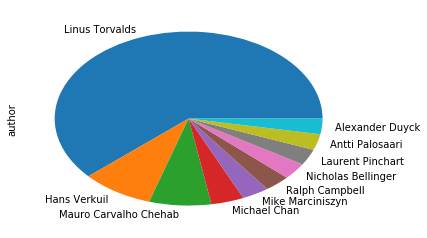

In [14]:
%matplotlib inline
top10_authors.plot.pie();

# No-Go Areas
We want to find the components, where knowledge is probably outdated.

In [7]:
blame_log.timestamp = pd.to_datetime(blame_log.timestamp)
blame_log.head()

,path,author,timestamp,line
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,1
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,2
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,3
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,2009-09-24 00:46:15,4
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,5


In [8]:
blame_log['age'] = pd.Timestamp('today') - blame_log.timestamp
blame_log.head()

,path,author,timestamp,line,age
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,1,1070 days 03:42:41.883875
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,2,1070 days 03:42:41.883875
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,3,1070 days 03:42:41.883875
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,2009-09-24 00:46:15,4,3324 days 11:51:11.883875
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,5,1070 days 03:42:41.883875


In [9]:
blame_log['component'] = blame_log.path.str.split("/").str[:2].str.join(":")
blame_log.head()

,path,author,timestamp,line,age,component
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,1,1070 days 03:42:41.883875,drivers:scsi
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,2,1070 days 03:42:41.883875,drivers:scsi
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,3,1070 days 03:42:41.883875,drivers:scsi
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,2009-09-24 00:46:15,4,3324 days 11:51:11.883875,drivers:scsi
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,5,1070 days 03:42:41.883875,drivers:scsi


In [10]:
age_per_component = blame_log.groupby('component') \
    .age.min().sort_values()
age_per_component.head()

component
drivers:scsi   202 days 19:11:17.883875
drivers:i2c    202 days 20:31:52.883875
drivers:net    202 days 20:47:08.883875
drivers:of     203 days 13:06:10.883875
drivers:pci    203 days 16:53:05.883875
Name: age, dtype: timedelta64[ns]

These are the oldest 10 components

In [11]:
age_per_component.tail(10)

component
arch:ia64         2774 days 23:32:40.883875
arch:unicore32    2803 days 23:16:08.883875
drivers:char      2815 days 20:10:04.883875
drivers:serial    2840 days 05:17:33.883875
drivers:mfd       2863 days 14:14:54.883875
include:scsi      3904 days 13:23:50.883875
arch:i386         4042 days 05:12:54.883875
drivers:usb       4199 days 07:39:57.883875
include:asm-arm   4352 days 23:02:33.883875
arch:sparc64      4647 days 01:44:42.883875
Name: age, dtype: timedelta64[ns]

For all components, we create an overview with a bar chart.

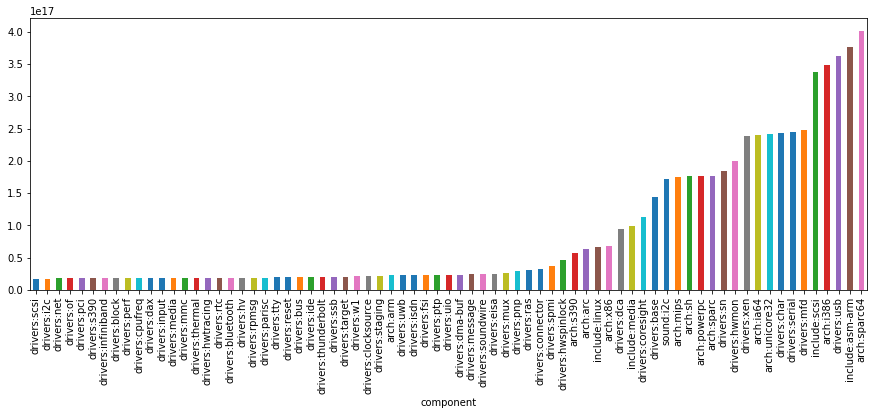

In [13]:
age_per_component.plot.bar(figsize=[15,5])

# Conclusion
The components around old computer architectures are those with the oldest code parts and therefore our main no-go areas!

# Next steps
Find out in the next architecture circle if we still need those old code bases.